<a href="https://colab.research.google.com/github/srijani-mitra/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#SPX (or S&P index) is the capitalisation index of 500 companies publicly traded
#GLD is the gold prices
#USO is United States Oil Prices
#SLV is Silver
#EUR/USD is country currency pair, like 1 Ero = 1.47 USD

In [6]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:

# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [10]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [12]:
correlation = gold_data.drop('Date',axis=1).corr()

<Axes: >

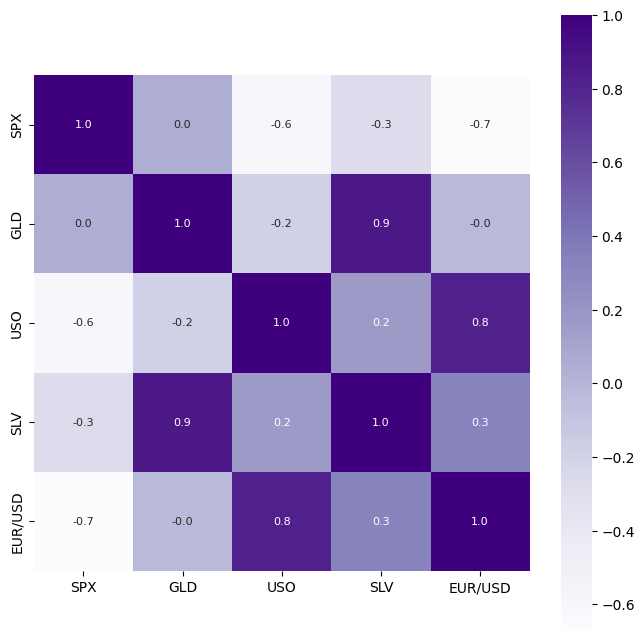

In [19]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Purples')

In [20]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

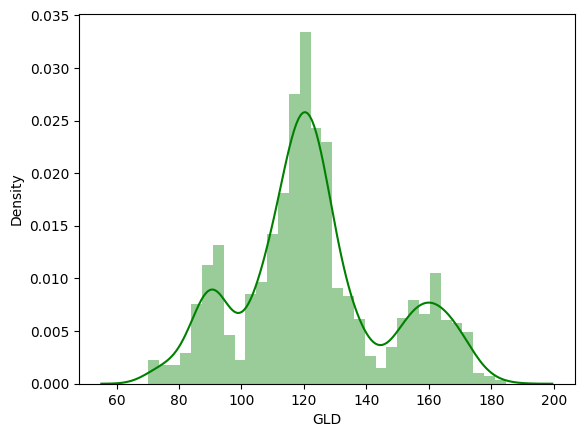

In [21]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Spliting the features and target

In [22]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [28]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[168.68539919  82.12149984 116.03659949 127.6749011  120.59670131
 154.74119779 150.37909909 126.13950013 117.58519873 125.97900073
 116.50400082 171.34700088 141.81679841 168.14559899 115.11730005
 117.3562006  138.16710298 170.29960162 159.20190228 162.85760019
 155.11269981 125.06989996 176.12379924 158.07930301 125.27950058
  93.74229995  76.89070022 120.70289985 119.17049961 167.41689939
  88.2684001  125.35429996  90.92480068 117.6593999  121.10559948
 136.41880167 115.65990107 115.02080083 147.95480011 107.23010086
 104.52290267  87.26129806 126.55500049 118.01459984 152.43449941
 119.66950012 108.2692004  107.99899789  93.34580086 126.92039839
  74.52180065 113.57349922 121.12960014 111.25429916 118.97869932
 120.26959953 159.98009986 167.6241011  147.14759722  85.84149882
  94.20330054  86.8855988   90.56640007 119.01230064 126.41450049
 127.66749994 169.88210039 122.25589929 117.41789835  98.75630083
 168.33870073 142.89589849 132.76310269 121.12660212 121.66149934
 119.69460

In [30]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9897897572072191


Compare the Actual Values and Predicted Values in a Plot

In [31]:
Y_test = list(Y_test)

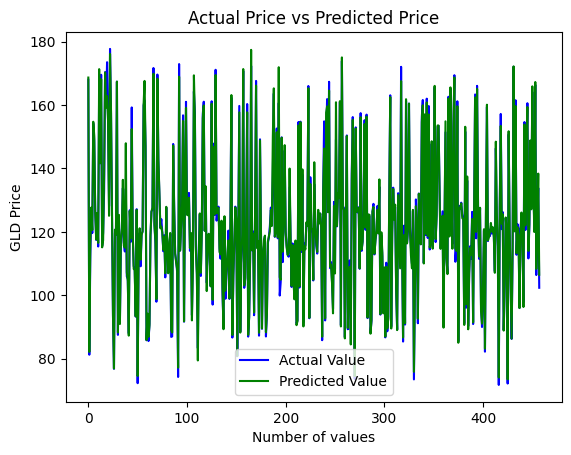

In [32]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [33]:
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error : ", mae)

# Mean Squared Error
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error : ", mse)

Mean Absolute Error :  1.2975002004366811
Mean Squared Error :  5.3853262011475795
